# Goldmember

Get data on gold

In [1]:
import csv, json, os, requests
from pathlib import Path
from dotenv import load_dotenv
import pandas as pd
import seaborn as sns


In [2]:
gold_url = "https://www.quandl.com/api/v3/datasets/LBMA/GOLD.json"
silver_url = "https://www.quandl.com/api/v3/datasets/LBMA/SILVER.json"
start_date = "2019-10-31"
end_date = "2020-10-31"
api_key = os.getenv("QUANDL_KEY")

In [3]:
data_raw = requests.get(gold_url, {
    "api_key": api_key,
    "start_date": start_date,
    "end_date": end_date
})
data_json = data_raw.json()
column_names = data_json["dataset"]['column_names']
data = data_json["dataset"]["data"]
gold_df = pd.DataFrame(data=data, columns=column_names)
gold_df.set_index("Date", drop=True, inplace=True)
gold_df['USD (PM)'].head(5)

Date
2020-10-30    1881.85
2020-10-29    1870.30
2020-10-28    1869.95
2020-10-27    1905.70
2020-10-26    1898.45
Name: USD (PM), dtype: float64

In [4]:
data_raw = requests.get(silver_url, {
    "api_key": api_key,
    "start_date": start_date,
    "end_date": end_date
})
data_json = data_raw.json()
column_names = data_json["dataset"]['column_names']
data = data_json["dataset"]["data"]
silver_df = pd.DataFrame(data=data, columns=column_names)
silver_df.set_index("Date", drop=True, inplace=True)
silver_df['USD'].head(5)

Date
2020-10-30    23.625
2020-10-29    23.015
2020-10-28    23.925
2020-10-27    24.435
2020-10-26    24.280
Name: USD, dtype: float64

In [5]:
btc_csv_path = Path("../data/crypto_data/output_batch_combined_BTC.csv")
btc_data = pd.read_csv(btc_csv_path)
btc_data.set_index("Date",drop=True,inplace=True)
#btc_data.drop("Unnamed: 0", inplace=True)
btc_data['Close'].head()

Date
2020-10-30    13571.51
2020-10-29    13460.00
2020-10-28    13281.05
2020-10-27    13698.18
2020-10-26    13068.79
Name: Close, dtype: float64

In [6]:
combined_data = pd.concat([btc_data['Close'],silver_df['USD'],gold_df['USD (PM)']], axis=1)
combined_data.dropna(inplace=True)
combined_data.rename(columns={
    'Close': 'BTC',
    'USD': 'Silver',
    'USD (PM)': 'Gold'
}, inplace=True)
combined_data.tail(5)

,BTC,Silver,Gold
2020-10-26,13068.79,24.280,1898.45
2020-10-27,13698.18,24.435,1905.70
2020-10-28,13281.05,23.925,1869.95
2020-10-29,13460.00,23.015,1870.30
2020-10-30,13571.51,23.625,1881.85


In [7]:
data_corr = combined_data.corr()
data_corr

,BTC,Silver,Gold
BTC,1.000000,0.824782,0.768764
Silver,0.824782,1.000000,0.812294
Gold,0.768764,0.812294,1.000000


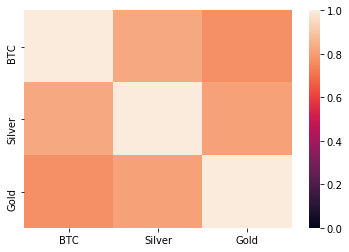

In [8]:
corr_plot = sns.heatmap(data_corr, vmax=1, vmin=0)

In [9]:
returns = combined_data.pct_change()
returns.tail(5)

,BTC,Silver,Gold
2020-10-26,0.010180,-0.019386,-0.002732
2020-10-27,0.048160,0.006384,0.003819
2020-10-28,-0.030451,-0.020872,-0.018760
2020-10-29,0.013474,-0.038036,0.000187
2020-10-30,0.008285,0.026504,0.006175


In [10]:
cumprod = (1 + returns).cumprod()
cumprod.dropna(inplace=True)
cumprod.tail(5)

,BTC,Silver,Gold
2020-10-26,1.426805,1.344780,1.256461
2020-10-27,1.495519,1.353365,1.261259
2020-10-28,1.449979,1.325118,1.237599
2020-10-29,1.469516,1.274716,1.237831
2020-10-30,1.481690,1.308502,1.245475


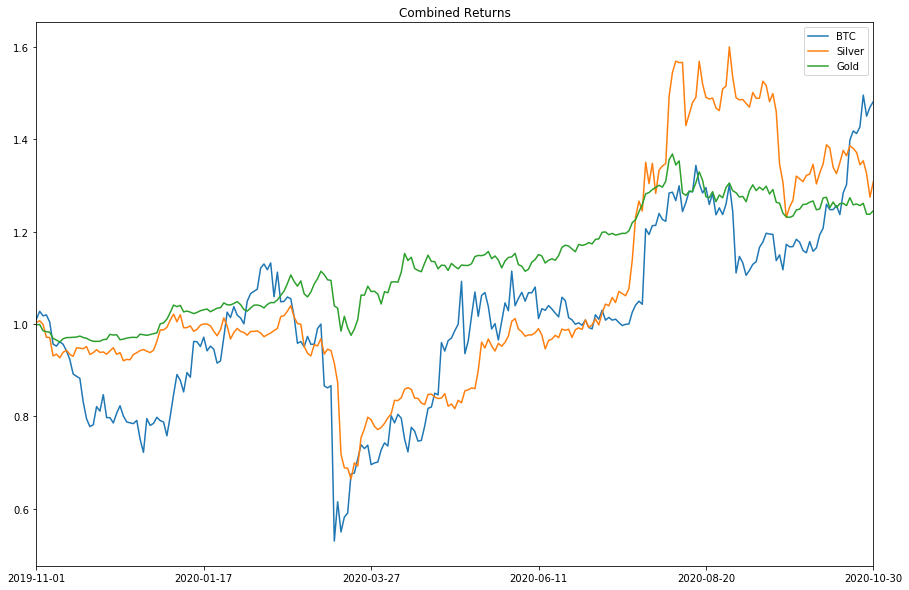

In [11]:
cumprod.plot(figsize=(15,10), title="Combined Returns")

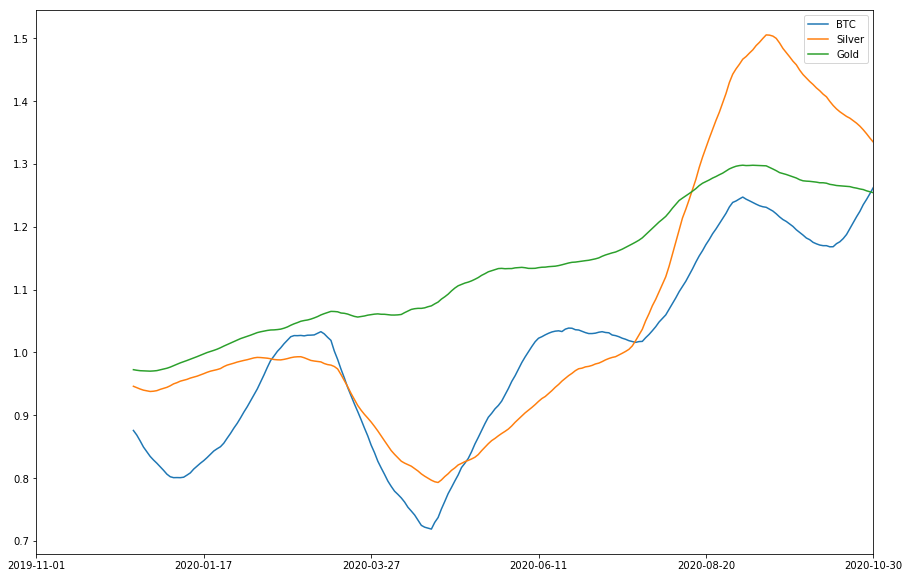

In [12]:
cumprod.rolling(window=30).mean().plot(figsize=(15,10))

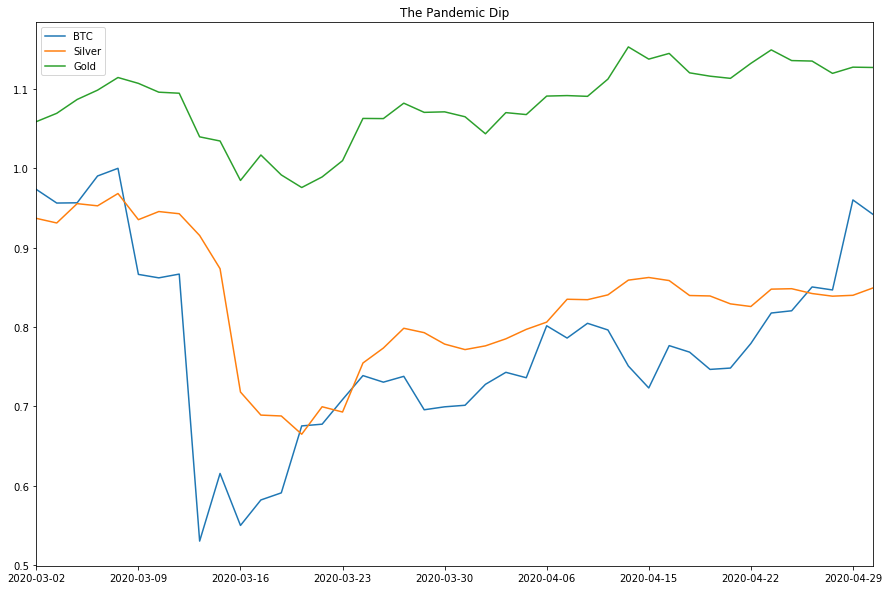

In [41]:
pandip = cumprod.loc['2020-03-01':'2020-04-30']
pandip.plot(figsize=(15,10), title="The Pandemic Dip")

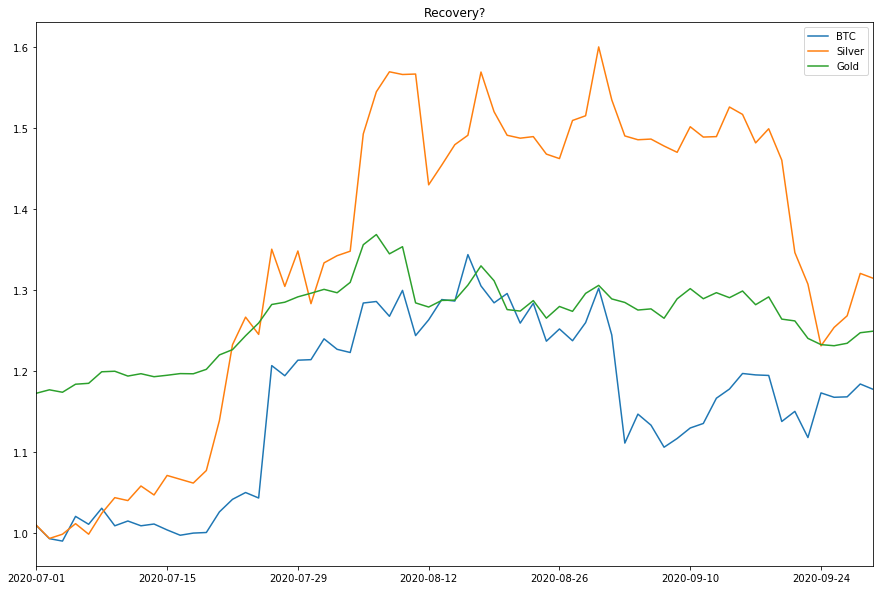

In [42]:
gettingbetter = cumprod.loc['2020-07-01':'2020-09-30']
gettingbetter.plot(figsize=(15,10), title="Recovery?")

In [49]:
initial_investment = 10000
combined_data['BTC'].diff()

2019-10-31       NaN
2019-11-01     93.64
2019-11-04    159.41
2019-11-05    -90.44
2019-11-06     19.18
2019-11-07   -142.43
2019-11-08   -435.83
2019-11-11    -41.47
2019-11-12     88.46
2019-11-13    -51.66
2019-11-14   -128.34
2019-11-15   -172.52
2019-11-18   -288.64
2019-11-19    -45.48
2019-11-20    -40.40
2019-11-21   -466.50
2019-11-22   -333.43
2019-11-25   -156.02
2019-11-26     35.66
2019-11-27    361.05
2019-11-28    -91.31
2019-11-29    327.59
2019-12-02   -454.99
2019-12-03     -2.07
2019-12-04   -103.95
2019-12-05    194.55
2019-12-06    146.54
2019-12-09   -202.57
2019-12-10   -118.14
2019-12-11    -18.14
               ...  
2020-09-21   -520.70
2020-09-22    114.31
2020-09-23   -296.03
2020-09-24    504.91
2020-09-25    -49.48
2020-09-28      5.02
2020-09-29    145.18
2020-09-30    -61.10
2020-10-01   -162.00
2020-10-02    -44.51
2020-10-05    221.88
2020-10-06   -192.34
2020-10-07     67.81
2020-10-08    262.62
2020-10-09    123.98
2020-10-12    478.39
2020-10-13   